In [ ]:
#hide
#all_slow

In [ ]:
#hide
#default_exp motif
import warnings
warnings.filterwarnings("ignore")
from nbdev.showdoc import show_doc
from IPython.display import HTML
%load_ext autoreload
%autoreload 2

# motif

>Processing and analyzing glycan sequences on a motif-basis

In [ ]:
#export
from glycowork.motif.analysis import *
from glycowork.motif.annotate import *
from glycowork.motif.graph import *
from glycowork.motif.processing import *
from glycowork.motif.query import *
from glycowork.motif.tokenization import *
from glycowork.glycan_data.loader import df_species

`motif` contains many functions to process glycans in various ways and use this processing to analyze glycans via curated motifs, graph features, and sequence features. It contains the following modules:

- `analysis` contains functions for downstream analyses of important glycan motifs etc.
- `annotate` contains functions to extract curated motifs, graph features, and sequence features from glycan sequences
- `graph` is used to convert glycan sequences to graphs and contains helper functions to search for motifs / check whether two sequences describe the same sequence, etc.
- `processing` contains all the basic functions to process IUPACcondensed glycan sequences into glycoletters etc. Also contains `get_lib` to construct the glycoletter library
- `query` is used to interact with the databases contained in glycowork, delivering insights for sequences of interest
- `tokenization` has helper functions to map m/z-->composition, composition-->structure, structure-->motif, and more

## analysis
 >downstream analyses of important glycan motifs

In [ ]:
show_doc(get_pvals_motifs)

<h4 id="get_pvals_motifs" class="doc_header"><code>get_pvals_motifs</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/motif/analysis.py#L18" class="source_link" style="float:right">[source]</a></h4>

> <code>get_pvals_motifs</code>(**`df`**, **`glycan_col_name`**=*`'glycan'`*, **`label_col_name`**=*`'target'`*, **`libr`**=*`None`*, **`thresh`**=*`1.645`*, **`sorting`**=*`True`*, **`feature_set`**=*`['exhaustive']`*, **`extra`**=*`'termini'`*, **`wildcard_list`**=*`[]`*, **`multiple_samples`**=*`False`*, **`motifs`**=*`None`*, **`estimate_speedup`**=*`False`*)

returns enriched motifs based on label data or predicted data

| Arguments:
| :-
| df (dataframe): dataframe containing glycan sequences and labels
| glycan_col_name (string): column name for glycan sequences; arbitrary if multiple_samples = True; default:'glycan'
| label_col_name (string): column name for labels; arbitrary if multiple_samples = True; default:'target'
| libr (list): sorted list of unique glycoletters observed in the glycans of our dataset
| thresh (float): threshold value to separate positive/negative; default is 1.645 for Z-scores
| sorting (bool): whether p-value dataframe should be sorted ascendingly; default: True
| feature_set (list): which feature set to use for annotations, add more to list to expand; default is 'exhaustive'; options are: 'known' (hand-crafted glycan features), 'graph' (structural graph features of glycans) and 'exhaustive' (all mono- and disaccharide features)
| extra (string): 'ignore' skips this, 'wildcards' allows for wildcard matching', and 'termini' allows for positional matching; default:'termini'
| wildcard_list (list): list of wildcard names (such as 'bond', 'Hex', 'HexNAc', 'Sia')
| multiple_samples (bool): set to True if you have multiple samples (rows) with glycan information (columns); default:False
| motifs (dataframe): can be used to pass a modified motif_list to the function; default:None
| estimate_speedup (bool): if True, pre-selects motifs for those which are present in glycans, not 100% exact; default:False

| Returns:
| :-
| Returns dataframe with p-values and corrected p-values for every glycan motif

In [ ]:
glycans = ['Man(a1-3)[Man(a1-6)][Xyl(b1-2)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-3)]GlcNAc',
           'Man(a1-2)Man(a1-2)Man(a1-3)[Man(a1-3)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
           'GalNAc(a1-4)GlcNAcA(a1-4)[GlcN(b1-7)]Kdo(a2-5)[Kdo(a2-4)]Kdo(a2-6)GlcOPN(b1-6)GlcOPN',
          'Man(a1-2)Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
           'Glc(b1-3)Glc(b1-3)Glc']
label = [3.234, 2.423, 0.733, 3.102, 0.108]
test_df = pd.DataFrame({'glycan':glycans, 'binding':label})

print("Glyco-Motif enrichment p-value test")
out = get_pvals_motifs(test_df, 'glycan', 'binding').iloc[:10,:]

Glyco-Motif enrichment p-value test


In [ ]:
#hide_input
HTML(out.style.set_properties(**{'font-size': '11pt', 'font-family': 'Helvetica','border-collapse': 'collapse','border': '1px solid black'}).render())

,motif,pval,corr_pval
4,GlcNAc,0.013469,0.394527
19,b1-4,0.013469,0.394527
8,Man,0.025198,0.590671
11,a1-3,0.025636,0.590671
13,a1-6,0.091752,0.958241
26,GlcNAc(b1-4)GlcNAc,0.091752,0.958241
33,Man(a1-3)Man,0.091752,0.958241
34,Man(a1-6)Man,0.091752,0.958241
35,Man(b1-4)GlcNAc,0.091752,0.958241
10,a1-2,0.130826,0.980276


In [ ]:
show_doc(get_representative_substructures)

<h4 id="get_representative_substructures" class="doc_header"><code>get_representative_substructures</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/motif/analysis.py#L87" class="source_link" style="float:right">[source]</a></h4>

> <code>get_representative_substructures</code>(**`enrichment_df`**, **`libr`**=*`None`*)

builds minimal glycans that contain enriched motifs from get_pvals_motifs

| Arguments:
| :-
| enrichment_df (dataframe): output from get_pvals_motifs
| libr (list): sorted list of unique glycoletters observed in the glycans of our dataset

| Returns:
| :-
| Returns up to 10 minimal glycans in a list

In [ ]:
show_doc(make_heatmap)

<h4 id="make_heatmap" class="doc_header"><code>make_heatmap</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/motif/analysis.py#L134" class="source_link" style="float:right">[source]</a></h4>

> <code>make_heatmap</code>(**`df`**, **`mode`**=*`'sequence'`*, **`libr`**=*`None`*, **`feature_set`**=*`['known']`*, **`extra`**=*`'termini'`*, **`wildcard_list`**=*`[]`*, **`datatype`**=*`'response'`*, **`rarity_filter`**=*`0.05`*, **`filepath`**=*`''`*, **`index_col`**=*`'target'`*, **`estimate_speedup`**=*`False`*, **\*\*`kwargs`**)

clusters samples based on glycan data (for instance glycan binding etc.)

| Arguments:
| :-
| df (dataframe): dataframe with glycan data, rows are samples and columns are glycans
| mode (string): whether glycan 'sequence' or 'motif' should be used for clustering; default:sequence
| libr (list): sorted list of unique glycoletters observed in the glycans of our dataset
| feature_set (list): which feature set to use for annotations, add more to list to expand; default is 'exhaustive'; options are: 'known' (hand-crafted glycan features), 'graph' (structural graph features of glycans) and 'exhaustive' (all mono- and disaccharide features)
| extra (string): 'ignore' skips this, 'wildcards' allows for wildcard matching', and 'termini' allows for positional matching; default:'termini'
| wildcard_list (list): list of wildcard names (such as 'bond', 'Hex', 'HexNAc', 'Sia')
| datatype (string): whether df comes from a dataset with quantitative variable ('response') or from presence_to_matrix ('presence')
| rarity_filter (float): proportion of samples that need to have a non-zero value for a variable to be included; default:0.05
| filepath (string): absolute path including full filename allows for saving the plot
| index_col (string): default column to convert to dataframe index; default:'target'
| estimate_speedup (bool): if True, pre-selects motifs for those which are present in glycans, not 100% exact; default:False
| **kwargs: keyword arguments that are directly passed on to seaborn clustermap
                      
| Returns:
| :-
| Prints clustermap                         

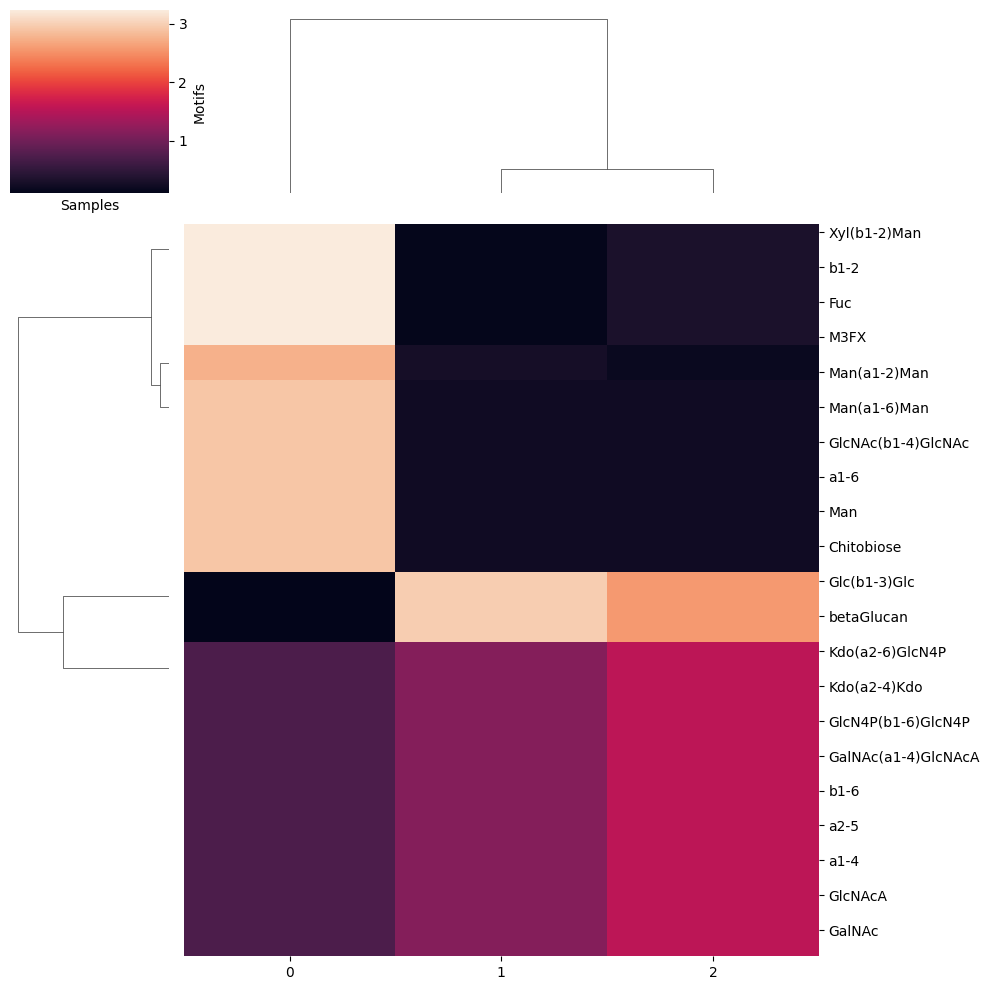

In [ ]:
glycans = ['Man(a1-3)[Man(a1-6)][Xyl(b1-2)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-3)]GlcNAc',
           'Man(a1-2)Man(a1-2)Man(a1-3)[Man(a1-3)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
           'GalNAc(a1-4)GlcNAcA(a1-4)[GlcN(b1-7)]Kdo(a2-5)[Kdo(a2-4)]Kdo(a2-6)GlcN4P(b1-6)GlcN4P',
           'Man(a1-2)Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
           'Glc(b1-3)Glc(b1-3)Glc']
label = [3.234, 2.423, 0.733, 3.102, 0.108]
label2 = [0.134, 0.345, 1.15, 0.233, 2.981]
label3 = [0.334, 0.245, 1.55, 0.133, 2.581]
test_df = pd.DataFrame([label, label2, label3], columns = glycans)

make_heatmap(test_df, mode = 'motif', feature_set = ['known', 'exhaustive'])

In [ ]:
show_doc(plot_embeddings)

<h4 id="plot_embeddings" class="doc_header"><code>plot_embeddings</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/motif/analysis.py#L199" class="source_link" style="float:right">[source]</a></h4>

> <code>plot_embeddings</code>(**`glycans`**, **`emb`**=*`None`*, **`label_list`**=*`None`*, **`shape_feature`**=*`None`*, **`filepath`**=*`''`*, **`alpha`**=*`0.8`*, **`palette`**=*`'colorblind'`*, **\*\*`kwargs`**)

plots glycan representations for a list of glycans

| Arguments:
| :-
| glycans (list): list of IUPAC-condensed glycan sequences as strings
| emb (dictionary): stored glycan representations; default takes them from trained species-level SweetNet model
| label_list (list): list of same length as glycans if coloring of the plot is desired
| shape_feature (string): monosaccharide/bond used to display alternative shapes for dots on the plot
| filepath (string): absolute path including full filename allows for saving the plot
| alpha (float): transparency of points in plot; default:0.8
| palette (string): color palette to color different classes; default:'colorblind'
| **kwargs: keyword arguments that are directly passed on to matplotlib

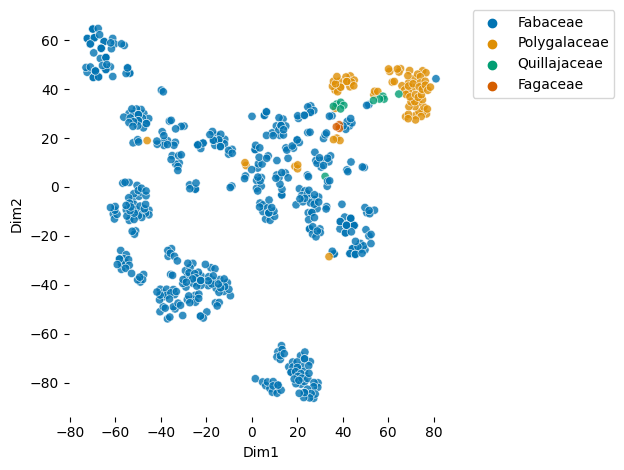

In [ ]:
df_fabales = df_species[df_species.Order == 'Fabales'].reset_index(drop = True)
plot_embeddings(df_fabales.target.values.tolist(), label_list = df_fabales.Family.values.tolist())

In [ ]:
show_doc(characterize_monosaccharide)

<h4 id="characterize_monosaccharide" class="doc_header"><code>characterize_monosaccharide</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/motif/analysis.py#L246" class="source_link" style="float:right">[source]</a></h4>

> <code>characterize_monosaccharide</code>(**`sugar`**, **`df`**=*`None`*, **`mode`**=*`'sugar'`*, **`glycan_col_name`**=*`'target'`*, **`rank`**=*`None`*, **`focus`**=*`None`*, **`modifications`**=*`False`*, **`filepath`**=*`''`*, **`thresh`**=*`10`*)

for a given monosaccharide/linkage, return typical neighboring linkage/monosaccharide

| Arguments:
| :-
| sugar (string): monosaccharide or linkage
| df (dataframe): dataframe to use for analysis; default:df_species
| mode (string): either 'sugar' (connected monosaccharides), 'bond' (monosaccharides making a provided linkage), or 'sugarbond' (linkages that a provided monosaccharides makes); default:'sugar'
| glycan_col_name (string): column name under which glycans can be found; default:'target'
| rank (string): add column name as string if you want to filter for a group
| focus (string): add row value as string if you want to filter for a group
| modifications (bool): set to True if you want to consider modified versions of a monosaccharide; default:False
| filepath (string): absolute path including full filename allows for saving the plot
| thresh (int): threshold count of when to include motifs in plot; default:10 occurrences

| Returns:
| :-
| Plots modification distribution and typical neighboring bond/monosaccharide

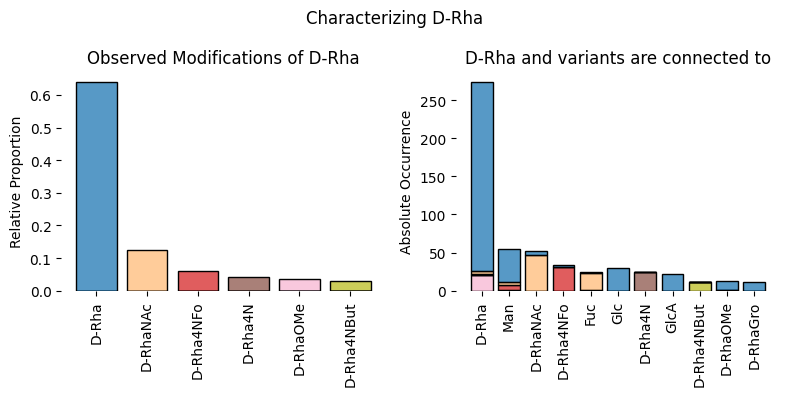

In [ ]:
characterize_monosaccharide('D-Rha', rank = 'Kingdom', focus = 'Bacteria', modifications = True)

## annotate
>extract curated motifs, graph features, and sequence features from glycan sequences

In [ ]:
show_doc(motif_matrix)

<h4 id="motif_matrix" class="doc_header"><code>motif_matrix</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/motif/annotate.py#L115" class="source_link" style="float:right">[source]</a></h4>

> <code>motif_matrix</code>(**`df`**, **`glycan_col_name`**, **`label_col_name`**, **`libr`**=*`None`*)

generates dataframe with counted glycoletters and disaccharides in glycans

| Arguments:
| :-
| df (dataframe): dataframe containing glycan sequences and labels
| glycan_col_name (string): column name for glycan sequences
| label_col_name (string): column name for labels; string
| libr (list): sorted list of unique glycoletters observed in the glycans of our dataset

| Returns:
| :-
| Returns dataframe with glycoletter + disaccharide counts (columns) for each glycan (rows)

In [ ]:
glycans = ['Man(a1-3)[Man(a1-6)][Xyl(b1-2)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-3)]GlcNAc',
           'Man(a1-2)Man(a1-2)Man(a1-3)[Man(a1-3)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
           'GalNAc(a1-4)GlcNAcA(a1-4)[GlcN(b1-7)]Kdo(a2-5)[Kdo(a2-4)]Kdo(a2-6)GlcN4P(b1-6)GlcN4P']
label = [1,1,0]
test_df = pd.DataFrame({'glycan':glycans, 'eukaryotic':label})
print("Glyco-Motif Test")
out = motif_matrix(test_df, 'glycan', 'eukaryotic')

Glyco-Motif Test


In [ ]:
#hide_input
HTML(out.style.set_properties(**{'font-size': '11pt', 'font-family': 'Helvetica','border-collapse': 'collapse','border': '1px solid black'}).render())

,0dHex,"1,4-Anhydro-Gal-ol","1,5-Anhydro-D-AltNAc-ol","1,5-Anhydro-D-FucN-ol","1,5-Anhydro-D-Rha4NAc-ol","1,5-Anhydro-Gal-ol","1,5-Anhydro-GalNAc-ol","1,5-Anhydro-Glc-ol","1,5-Anhydro-Glc-onic","1,5-Anhydro-GlcN2S-ol","1,5-Anhydro-GlcN2S6S-ol","1,5-Anhydro-GlcNAc-ol","1,5-Anhydro-GlcNAc-onic","1,5-Anhydro-Man-ol","1,5-Anhydro-ManNAc-ol","1,5-Anhydro-Xyl-ol","1,5-Anhydro-Xyl2F-ol",1-1,1-2,1-3,1-4,1-5,1-6,1-z,1dAlt-ol,1dEry-ol,"2,3-Anhydro-All","2,3-Anhydro-Man","2,3-Anhydro-Rib","2,5-Anhydro-D-Alt-ol","2,5-Anhydro-D-Alt3S-ol","2,5-Anhydro-D-Tal","2,5-Anhydro-Glc","2,5-Anhydro-L-Man-ol","2,5-Anhydro-Man","2,5-Anhydro-Man-ol","2,5-Anhydro-Man1S-ol","2,5-Anhydro-Man3S-ol","2,5-Anhydro-Man6S","2,5-Anhydro-Tal-ol","2,5-Anhydro-Tal6P","2,6-Anhydro-Glc5NAc-ol","2,6-Anhydro-L-Gul-ol","2,6-Anhydro-L-Gul-onic","2,6-Anhydro-Man-ol","2,6-Anhydro-Tal5NAc-ol","2,7-Anhydro-Kdo","2,7-Anhydro-Kdof",2-3,2-4,2-5,2-6,"3,6-Anhydro-Fruf","3,6-Anhydro-Gal","3,6-Anhydro-Gal2S","3,6-Anhydro-Glc","3,6-Anhydro-L-Gal","3,6-Anhydro-L-Gal2Me",3-1,3-5,3-Anhydro-Gal,3-Anhydro-Gal2S,3dFuc,3dGal,3dLyxHep-ulosaric,"4,7-Anhydro-Kdo","4,7-Anhydro-KdoOPEtN","4,8-Anhydro-Kdo",4-1,4-5,4d8dNeu5Ac,4dAraHex,4dEry-ol,4dFuc,4dGal,4dNeu5Ac,4dThrHexNAcA4en,4eLeg5Ac7Ac,5-1,5-2,5-3,5-4,5-5,5-6,5dAraf,5dAraf3Me,5dLyxf3CFo,5dLyxf3CMe,5dPenf3CFo,6-1,6-3,6-4,6dAll,6dAll3Me,6dAlt,6dAltNAc,6dAltNAc1PP4N,6dAltNAc1PP4NAc,6dAltNAc3PCho,6dAltOAc,6dAltf,6dAltfOAc,6dFruf,6dGal,6dGalNAc,6dGul,6dHex,6dHexN,6dHexNAc4NAc,6dManHep,6dTal,6dTal1PP,6dTal2Ac,6dTal2Ac3Ac,6dTal2Ac3Ac4Ac,6dTal2Ac3Me,6dTal2Ac3Me4Ac,6dTal2Ac4Ac,6dTal2Me,6dTal2Me4Ac,6dTal3Me,6dTal4Ac,6dTalNAc,6dTalNAc1PP,6dTalNAc4Ac,6dTalNAcOAc,6dTalOAc,6dTalOAcOAc,6dTalOAcOMe,6dTalOMe,6dTalOMe-ol,6dTalf,7dNeu5Ac,8dNeu5Ac,8eAci5Ac7Ac,8eLeg,8eLeg5Ac7Ac,8eLeg5Ac7Ac8Ac,8eLeg5Ac7AcGro,8eLeg5But7Ac,8eLegNAcNBut,9dNeu5Ac,Abe,Abe1PP,Abe2Ac,AbeOAc,AcefA,Aci5Ac7Ac,AcoNAc,All,All-ol,All1S2S3S4S,All2Ac3Ac,All2S3S4S,All3Ac,All6Ac,AllN,AllN1P,AllNAc,AllNAc6Me,AllOMe,Alt,AltA,AltA2N,AltA2S,AltAN,AltNAc,AltNAcA,AltNAcA1Prop,Altf,AltfOAc,Api,ApiOAc,ApiOMe-ol,Apif,Ara,Ara-ol,Ara1Me,Ara1N4P,Ara1P4N,Ara1PP,Ara1PP2NAc,Ara1PP4N,Ara1PP4NFo,Ara2Ac,Ara2Ac3Ac4Ac,Ara2Ac4Ac,Ara2Ac5P-ol,Ara2Me,Ara2P,Ara3Ac,Ara3Ac4Ac,Ara3Me,Ara3N,Ara4Ac,Ara4N,Ara4S,AraN,AraNMeOMe,AraOAc,AraOAcOP-ol,AraOMe,AraOPN,Araf,Araf1Coum,Araf1Fer,Araf1Gro,Araf1P,Araf1PP,Araf2Ac3Ac5Ac,Araf2Me,Araf3Me,Araf3S,ArafGro,ArafOMe,Asc,Bac,Bac1N2Ac4Ac,Bac1PP2Ac,Bac1PP2Ac4Ac,Bac2Ac,Bac2Ac4Ac,Col,Col1PP,"D-2,7-Anhydro-3dManHep-ulosonic",D-2dAraHex,D-2dAraHexA,D-3dAraHep-ulosonic,D-3dLyxHep-ulosaric,D-3dLyxHep2Me-ulosaric,D-3dManHep-ulosonic,D-3dThrHex-ulosonic,D-3dThrPen,D-3dXylHexOMe,D-4dAraHex,D-4dEryHexOAcN4en,D-4dLyxHep,D-4dLyxHep1Me,D-4dLyxHex,D-4dLyxHexOMe,D-4dThrHexA4en,D-4dThrHexAN4en,D-4dThrHexOAcN4en,D-4dXylHex,D-6dAllOMe,D-6dAlt,D-6dAltHep,D-6dAltHep3Me,D-6dAltHepf,D-6dAraHex,D-6dAraHexN,D-6dAraHexNAc,D-6dAraHexOMe,D-6dIdoHep,D-6dLyxHexOMe,D-6dManHep,D-6dManHep1P,D-6dManHep2Ac,D-6dManHep3Ac,D-6dManHepOAc,D-6dManHepOP,D-6dTal,D-6dTal-ol,D-6dTal2Ac,D-6dTal2Ac3Ac,D-6dTal2Ac4Ac,D-6dTal3Me,D-6dTal3Me-ol,D-6dTal4Ac,D-6dTalHep,D-6dTalOAc,D-6dTalOAcOMe,D-6dTalOMe,D-6dXylHex,D-6dXylHexN4Ulo,D-6dXylHexNAc4Ulo,D-6dXylHexOMe,D-7dLyxOct-ulosonic,D-9dThrAltNon-onic,D-All6Ac,D-AllN,D-Alt,D-Alt1Me,D-Alt2S3S4S,D-Alt3S4S,D-Apif,D-Apif1PP,D-Apif2Ac,D-ApifOAc,D-ApifOMe,D-Ara,D-Ara-aric,D-Ara-ol,D-Ara-onic,D-Ara1P-ol,D-Ara2S4S,D-Ara4S,D-Araf,D-Araf1Me,D-Araf2Ac3Ac5Ac,D-ArafN,D-Fuc,D-Fuc-ol,D-Fuc1CoumOMe,D-Fuc1FerOMe,D-Fuc1Gro,D-Fuc1Gro3NBut,D-Fuc2Ac,D-Fuc2Ac3Me,D-Fuc2Me,D-Fuc2Me3Me,D-Fuc2Me3Me4N,D-Fuc2Me4NAc,D-Fuc2S,D-Fuc3Ac,D-Fuc3Ac4Ac,D-Fuc3Me,D-Fuc3N,D-Fuc3NAlaAc,D-Fuc3NBut,D-Fuc3NBut4Ac,D-Fuc3NFo,D-Fuc3NLac,D-Fuc3S,D-Fuc4Ac,D-Fuc4CN,D-Fuc4Me,D-Fuc4N,D-Fuc4NBut,D-Fuc4NMe,D-Fuc4S,D-FucN,D-FucNAc,D-FucNAc-ol,D-FucNAc1Prop4N,D-FucNAc4Ac,D-FucNAc4N,D-FucNAc4NAc,D-FucNAc4NMe,D-FucNAcN,D-FucNAcNMe,D-FucNAcNMeN,D-FucNAcOAc,D-FucNAcOMe,D-FucNAcOP,D-FucNAcOPEtN,D-FucNAlaAc,D-FucNAsp,D-FucNBut,D-FucNFo,D-FucNMeN,D-FucNT

In [ ]:
show_doc(annotate_glycan)

<h4 id="annotate_glycan" class="doc_header"><code>annotate_glycan</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/motif/annotate.py#L176" class="source_link" style="float:right">[source]</a></h4>

> <code>annotate_glycan</code>(**`glycan`**, **`motifs`**=*`None`*, **`libr`**=*`None`*, **`extra`**=*`'termini'`*, **`wildcard_list`**=*`[]`*, **`termini_list`**=*`[]`*)

searches for known motifs in glycan sequence

| Arguments:
| :-
| glycan (string): IUPAC-condensed glycan sequence
| motifs (dataframe): dataframe of glycan motifs (name + sequence); default:motif_list
| libr (list): sorted list of unique glycoletters observed in the glycans of our dataset
| extra (string): 'ignore' skips this, 'wildcards' allows for wildcard matching', and 'termini' allows for positional matching; default:'termini'
| wildcard_list (list): list of wildcard names (such as 'bond', 'Hex', 'HexNAc', 'Sia')
| termini_list (list): list of monosaccharide/linkage positions (from 'terminal','internal', and 'flexible')

| Returns:
| :-
| Returns dataframe with counts of motifs in glycan

In [ ]:
show_doc(annotate_dataset)

<h4 id="annotate_dataset" class="doc_header"><code>annotate_dataset</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/motif/annotate.py#L222" class="source_link" style="float:right">[source]</a></h4>

> <code>annotate_dataset</code>(**`glycans`**, **`motifs`**=*`None`*, **`libr`**=*`None`*, **`feature_set`**=*`['known']`*, **`extra`**=*`'termini'`*, **`wildcard_list`**=*`[]`*, **`termini_list`**=*`[]`*, **`condense`**=*`False`*, **`estimate_speedup`**=*`False`*)

wrapper function to annotate motifs in list of glycans

| Arguments:
| :-
| glycans (list): list of IUPAC-condensed glycan sequences as strings
| motifs (dataframe): dataframe of glycan motifs (name + sequence); default:motif_list
| libr (list): sorted list of unique glycoletters observed in the glycans of our data; default:lib
| feature_set (list): which feature set to use for annotations, add more to list to expand; default is 'known'; options are: 'known' (hand-crafted glycan features), 'graph' (structural graph features of glycans) and 'exhaustive' (all mono- and disaccharide features)
| extra (string): 'ignore' skips this, 'wildcards' allows for wildcard matching', and 'termini' allows for positional matching; default:'termini'
| wildcard_list (list): list of wildcard names (such as 'bond', 'Hex', 'HexNAc', 'Sia')
| termini_list (list): list of monosaccharide/linkage positions (from 'terminal','internal', and 'flexible')
| condense (bool): if True, throws away columns with only zeroes; default:False
| estimate_speedup (bool): if True, pre-selects motifs for those which are present in glycans, not 100% exact; default:False

| Returns:
| :-                               
| Returns dataframe of glycans (rows) and presence/absence of known motifs (columns)

In [ ]:
glycans = ['Man(a1-3)[Man(a1-6)][Xyl(b1-2)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-3)]GlcNAc',
           'Man(a1-2)Man(a1-2)Man(a1-3)[Man(a1-3)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
           'GalNAc(a1-4)GlcNAcA(a1-4)[GlcN(b1-7)]Kdo(a2-5)[Kdo(a2-4)]Kdo(a2-6)GlcN4P(b1-6)GlcN4P']
print("Annotate Test")
out = annotate_dataset(glycans)

Annotate Test


In [ ]:
#hide_input
HTML(out.style.set_properties(**{'font-size': '11pt', 'font-family': 'Helvetica','border-collapse': 'collapse','border': '1px solid black'}).render())

,LewisX,LewisY,SialylLewisX,SulfoSialylLewisX,LewisA,LewisB,SialylLewisA,SulfoLewisA,H_type2,H_type1,A_antigen,B_antigen,Galili_antigen,GloboH,Gb5,Gb4,Gb3,3SGb3,8DSGb3,3SGb4,8DSGb4,6DSGb4,3SGb5,8DSGb5,6DSGb5,6DSGb5_2,6SGb3,8DSGb3_2,6SGb4,8DSGb4_2,6SGb5,8DSGb5_2,66DSGb5,Forssman_antigen,iGb3,I_antigen,i_antigen,PI_antigen,Chitobiose,Trimannosylcore,Internal_LacNAc_type1,Terminal_LacNAc_type1,Internal_LacNAc_type2,Terminal_LacNAc_type2,Internal_LacdiNAc_type1,Terminal_LacdiNAc_type1,Internal_LacdiNAc_type2,Terminal_LacdiNAc_type2,bisectingGlcNAc,VIM,PolyLacNAc,Ganglio_Series,Lacto_Series(LewisC),NeoLacto_Series,betaGlucan,KeratanSulfate,Hyluronan,Mollu_series,Arthro_series,Cellulose_like,Chondroitin_4S,GPI_anchor,Isoglobo_series,LewisD,Globo_series,SDA,Muco_series,Heparin,Peptidoglycan,Dermatansulfate,CAD,Lactosylceramide,Lactotriaosylceramide,LexLex,GM3,H_type3,GM2,GM1,cisGM1,VIM2,GD3,GD1a,GD2,GD1b,SDLex,Nglycolyl_GM2,Fuc_LN3,GT1b,GD1,GD1a_2,LcGg4,GT3,Disialyl_T_antigen,GT1a,GT2,GT1c,2Fuc_GM1,GQ1c,O_linked_mannose,GT1aa,GQ1b,HNK1,GQ1ba,O_mannose_Lex,2Fuc_GD1b,Sialopentaosylceramide,Sulfogangliotetraosylceramide,B-GM1,GQ1aa,bisSulfo-Lewis x,para-Forssman,core_fucose,core_fucose(a1-3),GP1c,B-GD1b,GP1ca,Isoglobotetraosylceramide,polySia,high_mannose,Gala_series,LPS_core,Nglycan_complex,Nglycan_complex2,Oglycan_core2,Oglycan_core3,Oglycan_core4,Oglycan_core5,Oglycan_core6,Oglycan_core7,Xylogalacturonan,Sialosylparagloboside,LDNF,OFuc,Arabinogalactan_type2,EGF_repeat,Nglycan_hybrid,Arabinan,Xyloglucan,Acharan_Sulfate,M3FX,M3X,1-6betaGalactan,Arabinogalactan_type1,Galactomannan,Tetraantennary_Nglycan,Mucin_elongated_core2,Fucoidan,Alginate,FG,XX,Difucosylated_core,GalFuc_core
Man(a1-3)[Man(a1-6)][Xyl(b1-2)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-3)]GlcNAc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
Man(a1-2)Man(a1-2)Man(a1-3)[Man(a1-3)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
GalNAc(a1-4)GlcNAcA(a1-4)[GlcN(b1-7)]Kdo(a2-5)[Kdo(a2-4)]Kdo(a2-6)GlcN4P(b1-6)GlcN4P,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
show_doc(get_k_saccharides)

<h4 id="get_k_saccharides" class="doc_header"><code>get_k_saccharides</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/motif/annotate.py#L278" class="source_link" style="float:right">[source]</a></h4>

> <code>get_k_saccharides</code>(**`glycan`**, **`libr`**=*`None`*, **`k`**=*`3`*)

function to retrieve k-saccharides (default:trisaccharides) occurring in a glycan

| Arguments:
| :-
| glycan (string): glycan in IUPAC-condensed nomenclature
| libr (list): sorted list of unique glycoletters observed in the glycans of our data; default:lib
| k (int): number of monosaccharides per -saccharide, default:3 (for trisaccharides)

| Returns:
| :-                               
| Returns list of trisaccharides in glycan in IUPAC-condensed nomenclature

In [ ]:
get_k_saccharides('GalNAc(a1-4)GlcNAcA(a1-4)[GlcN(b1-7)]Kdo(a2-5)[Kdo(a2-4)]Kdo(a2-6)GlcN4P(b1-6)GlcN4P',
                 k = 3)

['GalNAc(a1-4)GlcNAcA(a1-4)Kdo',
 'Kdo(a2-5)Kdo(a2-6)GlcN4P',
 'GlcNAcA(a1-4)Kdo(a2-5)Kdo',
 'GlcN(b1-7)Kdo(a2-5)Kdo',
 'Kdo(a2-5)Kdo(a2-4)Kdo',
 'Kdo(a2-4)Kdo(a2-6)GlcN4P',
 'Kdo(a2-6)GlcN4P(b1-6)GlcN4P']

## graph
>convert glycan sequences to graphs and contains helper functions to search for motifs / check whether two sequences describe the same sequence, etc.

In [ ]:
show_doc(glycan_to_nxGraph)

<h4 id="glycan_to_nxGraph" class="doc_header"><code>glycan_to_nxGraph</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/motif/graph.py#L118" class="source_link" style="float:right">[source]</a></h4>

> <code>glycan_to_nxGraph</code>(**`glycan`**, **`libr`**=*`None`*, **`termini`**=*`'ignore'`*, **`termini_list`**=*`None`*, **`override_reducing_end`**=*`False`*)

converts glycans into networkx graphs

| Arguments:
| :-
| glycan (string): glycan in IUPAC-condensed format
| libr (list): library of monosaccharides; if you have one use it, otherwise a comprehensive lib will be used
| termini (string): whether to encode terminal/internal position of monosaccharides, 'ignore' for skipping, 'calc' for automatic annotation, or 'provided' if this information is provided in termini_list; default:'ignore'
| termini_list (list): list of monosaccharide/linkage positions (from 'terminal','internal', and 'flexible')
| override_reducing_end (bool): if True, it allows graph generation for glycans ending in a linkage; though the output doesn't work with all downstream functions; default:False

| Returns:
| :-
| Returns networkx graph object of glycan

In [ ]:
print('Glycan to networkx Graph (only edges printed)')
print(glycan_to_nxGraph('Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc').edges())

Glycan to networkx Graph (only edges printed)
[(0, 1), (1, 4), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 10), (8, 9), (9, 10)]


In [ ]:
show_doc(graph_to_string)

<h4 id="graph_to_string" class="doc_header"><code>graph_to_string</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/motif/graph.py#L482" class="source_link" style="float:right">[source]</a></h4>

> <code>graph_to_string</code>(**`graph`**, **`fallback`**=*`False`*, **`libr`**=*`None`*)

converts glycan graph back to IUPAC-condensed format

| Arguments:
| :-
| graph (networkx object): glycan graph, works with most glycans. Will often not properly format repeat glycans, e.g., xyloglucan etc
| fallback (bool): just searches for the corresponding string in df_glycan; default:False
| libr (list): library of monosaccharides; if you have one use it, otherwise a comprehensive lib will be used

| Returns:
| :-
| Returns glycan in IUPAC-condensed format (string)

In [ ]:
graph_to_string(glycan_to_nxGraph('Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc'))

'Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc'

In [ ]:
show_doc(compare_glycans)

<h4 id="compare_glycans" class="doc_header"><code>compare_glycans</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/motif/graph.py#L195" class="source_link" style="float:right">[source]</a></h4>

> <code>compare_glycans</code>(**`glycan_a`**, **`glycan_b`**, **`libr`**=*`None`*, **`wildcards`**=*`False`*, **`wildcard_list`**=*`[]`*)

returns True if glycans are the same and False if not

| Arguments:
| :-
| glycan_a (string or networkx object): glycan in IUPAC-condensed format or as a precomputed networkx object
| glycan_b (stringor networkx object): glycan in IUPAC-condensed format or as a precomputed networkx object
| libr (list): library of monosaccharides; if you have one use it, otherwise a comprehensive lib will be used
| wildcards (bool): set to True to allow wildcards (e.g., 'z1-z', 'monosaccharide'); default is False
| wildcard_list (list): list of indices for wildcards in libr

| Returns:
| :-  
| Returns True if two glycans are the same and False if not

In [ ]:
print("Graph Isomorphism Test")
print(compare_glycans('Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
                      'Man(a1-6)[Man(a1-3)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc'))

Graph Isomorphism Test
True


In [ ]:
show_doc(subgraph_isomorphism)

<h4 id="subgraph_isomorphism" class="doc_header"><code>subgraph_isomorphism</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/motif/graph.py#L234" class="source_link" style="float:right">[source]</a></h4>

> <code>subgraph_isomorphism</code>(**`glycan`**, **`motif`**, **`libr`**=*`None`*, **`extra`**=*`'ignore'`*, **`wildcard_list`**=*`[]`*, **`termini_list`**=*`[]`*, **`count`**=*`False`*)

returns True if motif is in glycan and False if not

| Arguments:
| :-
| glycan (string): glycan in IUPAC-condensed format or as graph in NetworkX format
| motif (string): glycan motif in IUPAC-condensed format
| libr (list): library of monosaccharides; if you have one use it, otherwise a comprehensive lib will be used
| extra (string): 'ignore' skips this, 'wildcards' allows for wildcard matching', and 'termini' allows for positional matching; default:'ignore'
| wildcard_list (list): list of wildcard names (such as 'z1-z', 'Hex', 'HexNAc', 'Sia')
| termini_list (list): list of monosaccharide/linkage positions (from 'terminal','internal', and 'flexible')
| count (bool): whether to return the number or absence/presence of motifs; default:False

| Returns:
| :-
| Returns True if motif is in glycan and False if not

In [ ]:
print("Subgraph Isomorphism Test")
print(subgraph_isomorphism('Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
                           'Fuc(a1-6)GlcNAc'))

Subgraph Isomorphism Test
True


In [ ]:
show_doc(generate_graph_features)

<h4 id="generate_graph_features" class="doc_header"><code>generate_graph_features</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/motif/graph.py#L320" class="source_link" style="float:right">[source]</a></h4>

> <code>generate_graph_features</code>(**`glycan`**, **`glycan_graph`**=*`True`*, **`libr`**=*`None`*, **`label`**=*`'network'`*)

compute graph features of glycan

| Arguments:
| :-
| glycan (string or networkx object): glycan in IUPAC-condensed format (or glycan network if glycan_graph=False)
| glycan_graph (bool): True expects a glycan, False expects a network (from construct_network); default:True
| libr (list): library of monosaccharides; if you have one use it, otherwise a comprehensive lib will be used
| label (string): Label to place in output dataframe if glycan_graph=False; default:'network'

| Returns:
| :-
| Returns a pandas dataframe with different graph features as columns and glycan as row

In [ ]:
show_doc(largest_subgraph)

<h4 id="largest_subgraph" class="doc_header"><code>largest_subgraph</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/motif/graph.py#L560" class="source_link" style="float:right">[source]</a></h4>

> <code>largest_subgraph</code>(**`glycan_a`**, **`glycan_b`**, **`libr`**=*`None`*)

find the largest common subgraph of two glycans

| Arguments:
| :-
| glycan_a (string): glycan in IUPAC-condensed format
| glycan_b (string): glycan in IUPAC-condensed format
| libr (list): library of monosaccharides; if you have one use it, otherwise a comprehensive lib will be used

| Returns:
| :-  
| Returns the largest common subgraph as a string in IUPAC-condensed; returns empty string if there is no common subgraph

In [ ]:
glycan1 = 'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc'
glycan2 = 'Man(a1-3)[Man(a1-6)]Man(a1-6)[Man(a1-3)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc'
largest_subgraph(glycan1, glycan2)

'Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc'

## processing
>process IUPAC-condensed glycan sequences into glycoletters etc.

In [ ]:
show_doc(min_process_glycans)

<h4 id="min_process_glycans" class="doc_header"><code>min_process_glycans</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/motif/processing.py#L18" class="source_link" style="float:right">[source]</a></h4>

> <code>min_process_glycans</code>(**`glycan_list`**)

converts list of glycans into a nested lists of glycoletters

| Arguments:
| :-
| glycan_list (list): list of glycans in IUPAC-condensed format as strings

| Returns:
| :-
| Returns list of glycoletter lists

In [ ]:
min_process_glycans(['Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                     'Man(a1-2)Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc'])

[['Man', 'a1-3', 'Man', 'a1-6', 'Man', 'b1-4', 'GlcNAc', 'b1-4', 'GlcNAc'],
 ['Man',
  'a1-2',
  'Man',
  'a1-3',
  'Man',
  'a1-6',
  'Man',
  'b1-4',
  'GlcNAc',
  'b1-4',
  'GlcNAc']]

In [ ]:
show_doc(get_lib)

<h4 id="get_lib" class="doc_header"><code>get_lib</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/motif/processing.py#L31" class="source_link" style="float:right">[source]</a></h4>

> <code>get_lib</code>(**`glycan_list`**)

returns sorted list of unique glycoletters in list of glycans

| Arguments:
| :-
| glycan_list (list): list of IUPAC-condensed glycan sequences as strings

| Returns:
| :-
| Returns sorted list of unique glycoletters (strings) in glycan_list

In [ ]:
get_lib(['Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                     'Man(a1-2)Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc'])

['GlcNAc', 'Man', 'a1-2', 'a1-3', 'a1-6', 'b1-4']

In [ ]:
show_doc(expand_lib)

<h4 id="expand_lib" class="doc_header"><code>expand_lib</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/motif/processing.py#L48" class="source_link" style="float:right">[source]</a></h4>

> <code>expand_lib</code>(**`libr`**, **`glycan_list`**)

updates libr with newly introduced glycoletters

| Arguments:
| :-
| libr (list): sorted list of unique glycoletters observed in the glycans of our dataset
| glycan_list (list): list of IUPAC-condensed glycan sequences as strings

| Returns:
| :-
| Returns new lib

In [ ]:
lib1 = get_lib(['Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                     'Man(a1-2)Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc'])
lib2 = expand_lib(lib1, ['Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc'])
lib2

['Fuc', 'GlcNAc', 'Man', 'a1-2', 'a1-3', 'a1-6', 'b1-4']

In [ ]:
show_doc(presence_to_matrix)

<h4 id="presence_to_matrix" class="doc_header"><code>presence_to_matrix</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/motif/processing.py#L88" class="source_link" style="float:right">[source]</a></h4>

> <code>presence_to_matrix</code>(**`df`**, **`glycan_col_name`**=*`'target'`*, **`label_col_name`**=*`'Species'`*)

converts a dataframe such as df_species to absence/presence matrix

| Arguments:
| :-
| df (dataframe): dataframe with glycan occurrence, rows are glycan-label pairs
| glycan_col_name (string): column name under which glycans are stored; default:target
| label_col_name (string): column name under which labels are stored; default:Species

| Returns:
| :-
| Returns pandas dataframe with labels as rows and glycan occurrences as columns

In [ ]:
out = presence_to_matrix(df_species[df_species.Order == 'Fabales'].reset_index(drop = True),
                         label_col_name = 'Family')

In [ ]:
#hide_input
HTML(out.style.set_properties(**{'font-size': '11pt', 'font-family': 'Helvetica','border-collapse': 'collapse','border': '1px solid black'}).render())

In [ ]:
show_doc(choose_correct_isoform)

<h4 id="choose_correct_isoform" class="doc_header"><code>choose_correct_isoform</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/motif/processing.py#L107" class="source_link" style="float:right">[source]</a></h4>

> <code>choose_correct_isoform</code>(**`glycans`**, **`reverse`**=*`False`*)

given a list of glycan branch isomers, this function returns the correct isomer

| Arguments:
| :-
| glycans (list): glycans in IUPAC-condensed nomenclature
| reverse (bool): whether to return the correct isomer (False) or everything except the correct isomer (True); default:False

| Returns:
| :-
| Returns the correct isomer as a string (if reverse=False, otherwise it returns a list of strings)

## query
>for interacting with the databases contained in glycowork, delivering insights for sequences of interest

In [ ]:
show_doc(get_insight)

<h4 id="get_insight" class="doc_header"><code>get_insight</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/motif/query.py#L9" class="source_link" style="float:right">[source]</a></h4>

> <code>get_insight</code>(**`glycan`**, **`libr`**=*`None`*, **`motifs`**=*`None`*)

prints out meta-information about a glycan

| Arguments:
| :-
| glycan (string): glycan in IUPAC-condensed format
| libr (list): library of monosaccharides; if you have one use it, otherwise a comprehensive lib will be used
| motifs (dataframe): dataframe of glycan motifs (name + sequence); default:motif_list

In [ ]:
print("Test get_insight with 'Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc'")
get_insight('Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc')

Test get_insight with 'Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc'
Let's get rolling! Give us a few moments to crunch some numbers.

This glycan occurs in the following species: ['Aedes_aegypti', 'Angiostrongylus_cantonensis', 'Anopheles_gambiae', 'Antheraea_pernyi', 'Apis_mellifera', 'Ascaris_suum', 'Autographa_californica_nucleopolyhedrovirus', 'AvianInfluenzaA_Virus', 'Bombyx_mori', 'Bos_taurus', 'Caenorhabditis_elegans', 'Cardicola_forsteri', 'Cooperia_onchophora', 'Crassostrea_virginica', 'Cricetulus_griseus', 'Dictyocaulus_viviparus', 'Dirofilaria_immitis', 'Drosophila_melanogaster', 'Fasciola_hepatica', 'Gallus_gallus', 'Glossina_morsitans', 'Haemonchus_contortus', 'Haliotis_tuberculata', 'Heligmosomoides_polygyrus', 'Homo_sapiens', 'HumanImmunoDeficiency_Virus', 'Hylesia_metabus', 'Lutzomyia_longipalpis', 'Lymantria_dispar', 'Mamestra_brassicae', 'Megathura_crenulata', 'Mus_musculus', 'Nilaparvata_lugens', 'Oesophagostomum_dentatum', 'Ophiactis_savignyi', 'Opist

In [ ]:
show_doc(glytoucan_to_glycan)

<h4 id="glytoucan_to_glycan" class="doc_header"><code>glytoucan_to_glycan</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/motif/query.py#L63" class="source_link" style="float:right">[source]</a></h4>

> <code>glytoucan_to_glycan</code>(**`ids`**, **`revert`**=*`False`*)

interconverts GlyTouCan IDs and glycans in IUPAC-condensed

| Arguments:
| :-
| ids (list): list of GlyTouCan IDs as strings (if using glycans instead, change 'revert' to True
| revert (bool): whether glycans should be mapped to GlyTouCan IDs or vice versa; default:False

| Returns:
| :-
| Returns list of either GlyTouCan IDs or glycans in IUPAC-condensed

In [ ]:
glytoucan_to_glycan(['G59003TN', 'G88185OE'])

['Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
 'GlcNAc(b1-2)Man(a1-3)[GlcNAc(b1-2)Man(a1-6)][Xyl(b1-2)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-3)]GlcNAc']

## tokenization
>helper functions to map m/z-->composition, composition-->structure, structure-->motif, and more

In [ ]:
show_doc(string_to_labels)

<h4 id="string_to_labels" class="doc_header"><code>string_to_labels</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/motif/tokenization.py#L80" class="source_link" style="float:right">[source]</a></h4>

> <code>string_to_labels</code>(**`character_string`**, **`libr`**=*`None`*)

tokenizes word by indexing characters in passed library

| Arguments:
| :-
| character_string (string): string of characters to index
| libr (list): list of library items

| Returns:
| :-
| Returns indexes of characters in library

In [ ]:
string_to_labels(['Man','a1-3','Man','a1-6','Man'])

[1773, 2305, 1773, 2308, 1773]

In [ ]:
show_doc(pad_sequence)

<h4 id="pad_sequence" class="doc_header"><code>pad_sequence</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/motif/tokenization.py#L94" class="source_link" style="float:right">[source]</a></h4>

> <code>pad_sequence</code>(**`seq`**, **`max_length`**, **`pad_label`**=*`None`*, **`libr`**=*`None`*)

brings all sequences to same length by adding padding token

| Arguments:
| :-
| seq (list): sequence to pad (from string_to_labels)
| max_length (int): sequence length to pad to
| pad_label (int): which padding label to use
| libr (list): list of library items


| Returns:
| :-
| Returns padded sequence

In [ ]:
pad_sequence(string_to_labels(['Man','a1-3','Man','a1-6','Man']), 7)

[1773, 2305, 1773, 2308, 1773, 2360, 2360]

In [ ]:
show_doc(stemify_glycan)

<h4 id="stemify_glycan" class="doc_header"><code>stemify_glycan</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/motif/tokenization.py#L164" class="source_link" style="float:right">[source]</a></h4>

> <code>stemify_glycan</code>(**`glycan`**, **`stem_lib`**=*`None`*, **`libr`**=*`None`*)

removes modifications from all monosaccharides in a glycan

| Arguments:
| :-
| glycan (string): glycan in IUPAC-condensed format
| stem_lib (dictionary): dictionary of form modified_monosaccharide:core_monosaccharide; default:created from lib
| libr (list): sorted list of unique glycoletters observed in the glycans of our dataset; default:lib

| Returns:
| :-
| Returns stemmed glycan as string

In [ ]:
show_doc(stemify_dataset)

<h4 id="stemify_dataset" class="doc_header"><code>stemify_dataset</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/motif/tokenization.py#L222" class="source_link" style="float:right">[source]</a></h4>

> <code>stemify_dataset</code>(**`df`**, **`stem_lib`**=*`None`*, **`libr`**=*`None`*, **`glycan_col_name`**=*`'target'`*, **`rarity_filter`**=*`1`*)

stemifies all glycans in a dataset by removing monosaccharide modifications

| Arguments:
| :-
| df (dataframe): dataframe with glycans in IUPAC-condensed format in column glycan_col_name
| stem_lib (dictionary): dictionary of form modified_monosaccharide:core_monosaccharide; default:created from lib
| libr (list): sorted list of unique glycoletters observed in the glycans of our dataset; default:lib
| glycan_col_name (string): column name under which glycans are stored; default:target
| rarity_filter (int): how often monosaccharide modification has to occur to not get removed; default:1

| Returns:
| :-
| Returns df with glycans stemified

In [ ]:
show_doc(mask_rare_glycoletters)

<h4 id="mask_rare_glycoletters" class="doc_header"><code>mask_rare_glycoletters</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/motif/tokenization.py#L737" class="source_link" style="float:right">[source]</a></h4>

> <code>mask_rare_glycoletters</code>(**`glycans`**, **`thresh_monosaccharides`**=*`None`*, **`thresh_linkages`**=*`None`*)

masks rare monosaccharides and linkages in a list of glycans

| Arguments:
| :-
| glycans (list): list of glycans in IUPAC-condensed form
| thresh_monosaccharides (int): threshold-value for monosaccharides seen as "rare"; default:(0.001*len(glycans))
| thresh_linkages (int): threshold-value for linkages seen as "rare"; default:(0.03*len(glycans))

| Returns:
| :-
| Returns list of glycans in IUPAC-condensed with masked rare monosaccharides and linkages

In [ ]:
show_doc(match_composition)

<h4 id="match_composition" class="doc_header"><code>match_composition</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/motif/tokenization.py#L354" class="source_link" style="float:right">[source]</a></h4>

> <code>match_composition</code>(**`composition`**, **`group`**, **`level`**, **`df`**=*`None`*, **`mode`**=*`'minimal'`*, **`libr`**=*`None`*, **`glycans`**=*`None`*, **`relaxed`**=*`False`*)

Given a monosaccharide composition, it returns all corresponding glycans

| Arguments:
| :-
| composition (dict): a dictionary indicating the composition to match (for example {"Fuc":1, "Gal":1, "GlcNAc":1})
| group (string): name of the Species, Genus, Family, Order, Class, Phylum, Kingdom, or Domain used to filter
| level (string): Species, Genus, Family, Order, Class, Phylum, Kingdom, or Domain
| df (dataframe): glycan dataframe for searching glycan structures; default:df_species
| mode (string): can be "minimal" or "exact" to match glycans that contain at least the specified composition or glycans matching exactly the requirements
| libr (list): sorted list of unique glycoletters observed in the glycans of our dataset; default:lib
| glycans (list): custom list of glycans to check the composition in; default:None
| relaxed (bool): specify if "minimal" means exact counts (False) or _at least_ (True); default:False

| Returns:
| :-
| Returns list of glycans matching composition in IUPAC-condensed

In [ ]:
match_composition({"Glc":1, "Gal":1, "Neu5Ac":1}, "Homo_sapiens", "Species", mode = "exact")

['Neu5Ac(a2-3)Gal(b1-4)Glc-ol', 'Neu5Ac(a2-6)Gal(b1-4)Glc-ol']

In [ ]:
show_doc(match_composition_relaxed)

<h4 id="match_composition_relaxed" class="doc_header"><code>match_composition_relaxed</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/motif/tokenization.py#L423" class="source_link" style="float:right">[source]</a></h4>

> <code>match_composition_relaxed</code>(**`composition`**, **`group`**, **`level`**, **`df`**=*`None`*, **`mode`**=*`'exact'`*, **`libr`**=*`None`*, **`reducing_end`**=*`None`*, **`Hex_list`**=*`None`*, **`HexNAc_list`**=*`None`*, **`dHex_list`**=*`None`*)

Given a coarse-grained monosaccharide composition (Hex, HexNAc, etc.), it returns all corresponding glycans

| Arguments:
| :-
| composition (dict): a dictionary indicating the composition to match (for example {"Fuc":1, "Gal":1, "GlcNAc":1})
| group (string): name of the Species, Genus, Family, Order, Class, Phylum, Kingdom, or Domain used to filter
| level (string): Species, Genus, Family, Order, Class, Phylum, Kingdom, or Domain
| df (dataframe): glycan dataframe for searching glycan structures; default:df_species
| mode (string): can be "minimal" or "exact" to match glycans that contain at least the specified composition or glycans matching exactly the requirements; default:"exact"
| libr (list): sorted list of unique glycoletters observed in the glycans of our dataset; default:lib
| reducing_end (string): filters possible glycans by reducing end monosaccharide; default:None
| Hex_list (list): list of hexoses used for matching Hex; default: internal Hex list
| HexNAc_list (list): list of N-acetylhexosamines used for matching HexNAc; default: internal HexNAc list
| dHex_list (list): list of deoxyhexoses used for matching dHex; default: internal dHex list

| Returns:
| :-
| Returns list of glycans matching composition in IUPAC-condensed

In [ ]:
match_composition_relaxed({"Hex":3, "HexNAc":2, "dHex":1}, "Homo_sapiens", "Species")

['Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-2)Man(a1-3)Man(b1-4)GlcNAc',
 'Fuc(a1-2)Gal(b1-z)GlcNAc(b1-3)Gal(b1-3)[Gal(b1-6)]GalNAc',
 'Fuc(a1-2)[Gal(a1-3)]Gal(b1-3)GlcNAc(b1-3)Gal(b1-3)GalNAc',
 'Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-4)Man(a1-3)Man(b1-4)GlcNAc',
 'Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-4)Man(a1-6)Man(b1-4)GlcNAc',
 'Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-3)Gal(b1-4)GlcNAc(b1-3)Gal',
 'Man(a1-z)[Man(a1-z)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-z)]GlcNAc',
 'Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-2)Man(a1-6)Man(b1-4)GlcNAc',
 'Fuc(a1-2)[Gal(a1-3)]Gal(b1-4)GlcNAc(b1-6)[Gal(b1-3)]GalNAc',
 'Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
 'Fuc(a1-2)Gal(b1-3)GlcNAc(b1-3)Gal(b1-4)GlcNAc(z1-z)Man']

In [ ]:
show_doc(condense_composition_matching)

<h4 id="condense_composition_matching" class="doc_header"><code>condense_composition_matching</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/motif/tokenization.py#L543" class="source_link" style="float:right">[source]</a></h4>

> <code>condense_composition_matching</code>(**`matched_composition`**, **`libr`**=*`None`*)

Given a list of glycans matching a composition, find the minimum number of glycans characterizing this set

| Arguments:
| :-
| matched_composition (list): list of glycans matching to a composition
| libr (list): sorted list of unique glycoletters observed in the glycans of our dataset; default:lib

| Returns:
| :-
| Returns minimal list of glycans that match a composition

In [ ]:
match_comp = match_composition_relaxed({'Hex':1, 'HexNAc':1, 'Neu5Ac':1},
                                       'Homo_sapiens', 'Species', reducing_end = 'GalNAc')
print(match_comp)
condense_composition_matching(match_comp)

['Neu5Ac(a2-3)Gal(b1-3)GalNAc', 'Neu5Ac(a2-3)Gal(z1-z)GalNAc', 'Gal(b1-3)[Neu5Ac(a2-6)]GalNAc', 'Neu5Ac(a2-z)Gal(b1-3)GalNAc', 'Neu5Ac(a2-3)Gal(b1-4)GalNAc', 'Gal(b1-z)[Neu5Ac(a2-z)]GalNAc', 'Neu5Ac(a2-6)Gal(b1-3)GalNAc', 'Neu5Ac(a2-6)Gal(a1-3)GalNAc', 'Gal(a1-3)[Neu5Ac(a2-6)]GalNAc']


['Neu5Ac(a2-3)Gal(b1-3)GalNAc',
 'Gal(b1-3)[Neu5Ac(a2-6)]GalNAc',
 'Gal(a1-3)[Neu5Ac(a2-6)]GalNAc',
 'Neu5Ac(a2-3)Gal(b1-4)GalNAc',
 'Neu5Ac(a2-6)Gal(b1-3)GalNAc',
 'Neu5Ac(a2-6)Gal(a1-3)GalNAc']

In [ ]:
show_doc(mz_to_structures)

<h4 id="mz_to_structures" class="doc_header"><code>mz_to_structures</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/motif/tokenization.py#L636" class="source_link" style="float:right">[source]</a></h4>

> <code>mz_to_structures</code>(**`mz_list`**, **`reducing_end`**, **`group`**=*`'Homo_sapiens'`*, **`level`**=*`'Species'`*, **`abundances`**=*`None`*, **`mode`**=*`'positive'`*, **`mass_value`**=*`'monoisotopic'`*, **`sample_prep`**=*`'underivatized'`*, **`mass_tolerance`**=*`0.2`*, **`check_all_adducts`**=*`False`*, **`check_specific_adduct`**=*`None`*, **`ptm`**=*`False`*, **`df`**=*`None`*, **`libr`**=*`None`*, **`verbose`**=*`False`*)

wrapper function to map precursor masses to structures, condense them, and match them with relative intensities

| Arguments:
| :-
| mz_list (list): list of precursor masses
| reducing_end (string): filters possible glycans by reducing end monosaccharide
| group (string): name of the Species, Genus, Family, Order, Class, Phylum, Kingdom, or Domain used to filter; default:Homo_sapiens
| level (string): Species, Genus, Family, Order, Class, Phylum, Kingdom, or Domain; default:Species
| abundances (dataframe): every row one composition (matching mz_list in order), every column one sample; default:pd.DataFrame([range(len(mz_list))]*2).T
| mode (string): whether mz_value comes from MS in 'positive' or 'negative' mode; default:'positive'
| mass_value (string): whether the expected mass is 'monoisotopic' or 'average'; default:'monoisotopic'
| sample_prep (string): whether the glycans has been 'underivatized', 'permethylated', or 'peracetylated'; default:'underivatized'
| mass_tolerance (float): how much deviation to tolerate for a match; default:0.2
| check_all_adducts (bool): whether to also check for matches with ion adducts (depending on mode); default:False
| check_specific_adduct (string): choose adduct from 'H+', 'Na+', 'K+', 'H', 'Acetate', 'Trifluoroacetic acid'; default:None
| ptm (bool): whether to check for post-translational modification (sulfation, phosphorylation); default:False
| df (dataframe): glycan dataframe for searching glycan structures; default:df_species
| libr (list): sorted list of unique glycoletters observed in the glycans of our dataset; default:lib
| verbose (bool): whether to print any non-matching compositions; default:False

| Returns:
| :-
| Returns dataframe of (matched structures) x (relative intensities)

In [ ]:
show_doc(compositions_to_structures)

<h4 id="compositions_to_structures" class="doc_header"><code>compositions_to_structures</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/motif/tokenization.py#L579" class="source_link" style="float:right">[source]</a></h4>

> <code>compositions_to_structures</code>(**`composition_list`**, **`group`**=*`'Homo_sapiens'`*, **`level`**=*`'Species'`*, **`abundances`**=*`None`*, **`df`**=*`None`*, **`libr`**=*`None`*, **`reducing_end`**=*`None`*, **`verbose`**=*`False`*, **`Hex_list`**=*`None`*, **`HexNAc_list`**=*`None`*, **`dHex_list`**=*`None`*)

wrapper function to map compositions to structures, condense them, and match them with relative intensities

| Arguments:
| :-
| composition_list (list): list of composition dictionaries of the form {'Hex': 1, 'HexNAc': 1}
| group (string): name of the Species, Genus, Family, Order, Class, Phylum, Kingdom, or Domain used to filter; default:Homo_sapiens
| level (string): Species, Genus, Family, Order, Class, Phylum, Kingdom, or Domain; default:Species
| abundances (dataframe): every row one composition (matching composition_list in order), every column one sample;default:pd.DataFrame([range(len(composition_list))]*2).T
| df (dataframe): glycan dataframe for searching glycan structures; default:df_species
| libr (list): sorted list of unique glycoletters observed in the glycans of our dataset; default:lib
| reducing_end (string): filters possible glycans by reducing end monosaccharide; default:None
| verbose (bool): whether to print any non-matching compositions; default:False
| Hex_list (list): list of hexoses used for matching Hex; default: internal Hex list
| HexNAc_list (list): list of N-acetylhexosamines used for matching HexNAc; default: internal HexNAc list
| dHex_list (list): list of deoxyhexoses used for matching dHex; default: internal dHex list

| Returns:
| :-
| Returns dataframe of (matched structures) x (relative intensities)

In [ ]:
show_doc(structures_to_motifs)

<h4 id="structures_to_motifs" class="doc_header"><code>structures_to_motifs</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/motif/tokenization.py#L699" class="source_link" style="float:right">[source]</a></h4>

> <code>structures_to_motifs</code>(**`df`**, **`libr`**=*`None`*, **`feature_set`**=*`['exhaustive']`*, **`form`**=*`'wide'`*)

function to convert relative intensities of glycan structures to those of glycan motifs

| Arguments:
| :-
| df (dataframe): function expects glycans in the first column and rel. intensities of each sample in a new column
| libr (list): sorted list of unique glycoletters observed in the glycans of our dataset; default:lib
| feature_set (list): which feature set to use for annotations, add more to list to expand; default is 'exhaustive'; options are: 'known' (hand-crafted glycan features), 'graph' (structural graph features of glycans) and 'exhaustive' (all mono- and disaccharide features)
| form (string): whether to return 'wide' or 'long' dataframe; default:'wide'

| Returns:
| :-
| Returns dataframe of motifs, relative intensities, and sample IDs

In [ ]:
show_doc(canonicalize_iupac)

<h4 id="canonicalize_iupac" class="doc_header"><code>canonicalize_iupac</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/motif/tokenization.py#L783" class="source_link" style="float:right">[source]</a></h4>

> <code>canonicalize_iupac</code>(**`glycan`**)

converts a glycan from any IUPAC flavor into the exact IUPAC-condensed version that is optimized for glycowork

| Arguments:
| :-
| glycan (string): glycan sequence in IUPAC; post-biosynthetic modifications can still be an issue

| Returns:
| :-
| Returns glycan as a string in canonicalized IUPAC-condensed

In [ ]:
show_doc(structure_to_basic)

<h4 id="structure_to_basic" class="doc_header"><code>structure_to_basic</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/motif/tokenization.py#L879" class="source_link" style="float:right">[source]</a></h4>

> <code>structure_to_basic</code>(**`glycan`**, **`libr`**=*`None`*)

converts a monosaccharide- and linkage-defined glycan structure to the base topology

| Arguments:
| :-
| glycan (string): glycan in IUPAC-condensed nomenclature
| libr (list): library of monosaccharides; if you have one use it, otherwise a comprehensive lib will be used

| Returns:
| :-
| Returns the glycan topology as a string

In [ ]:
show_doc(glycan_to_composition)

<h4 id="glycan_to_composition" class="doc_header"><code>glycan_to_composition</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/motif/tokenization.py#L899" class="source_link" style="float:right">[source]</a></h4>

> <code>glycan_to_composition</code>(**`glycan`**, **`libr`**=*`None`*)

maps glycan to its composition

| Arguments:
| :-
| glycan (string): glycan in IUPAC-condensed format
| libr (list): library of monosaccharides; if you have one use it, otherwise a comprehensive lib will be used

| Returns:
| :-
| Returns a dictionary of form "monosaccharide" : count

In [ ]:
show_doc(calculate_theoretical_mass)

<h4 id="calculate_theoretical_mass" class="doc_header"><code>calculate_theoretical_mass</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/motif/tokenization.py#L916" class="source_link" style="float:right">[source]</a></h4>

> <code>calculate_theoretical_mass</code>(**`glycan`**, **`mass_value`**=*`'monoisotopic'`*, **`sample_prep`**=*`'underivatized'`*, **`libr`**=*`None`*)

given a glycan, calculates it's theoretical mass; only allowed extra-modifications are sulfation & phosphorylation

| Arguments:
| :-
| glycan (string): glycan in IUPAC-condensed format
| mass_value (string): whether the expected mass is 'monoisotopic' or 'average'; default:'monoisotopic'
| sample_prep (string): whether the glycans has been 'underivatized', 'permethylated', or 'peracetylated'; default:'underivatized'
| libr (list): library of monosaccharides; if you have one use it, otherwise a comprehensive lib will be used

| Returns:
| :-
| Returns the theoretical mass of input glycan

In [ ]:
#hide
from nbdev.export import notebook2script; notebook2script()

Converted 00_core.ipynb.
Converted 01_glycan_data.ipynb.
Converted 02_ml.ipynb.
Converted 03_motif.ipynb.
Converted 04_network.ipynb.
Converted 05_examples.ipynb.
Converted index.ipynb.
